<a href="https://colab.research.google.com/github/jesusdme/modelos_colab/blob/main/Modelo_Cafe_Colombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Random Forest Regressor Café


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Cargar los datos
data = pd.read_csv('Cafe_Dataset_Colombia_Final.csv')

# Selección de características y variable objetivo
X = data.drop(columns=['coffee_sold', 'filter'])
y = data['coffee_sold']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 184.51197053406997
R-squared (R²): 0.8442235795141263


In [ ]:
import pandas as pd

def predecir_rendimiento(Year, coffee_hectare, coffee_improved_hectare, coffee_improved_cost,
                         coffee_hectare_fertilizer, coffee_fertilizer_cost, coffee_chemical_hectare,
                         coffee_chemical_cost, coffee_machinery_hectare, coffee_machinery_cost,
                         coffee_harvested, coffee_sold_price, coffee_harvest_loss, filter_quartile, modelo):

    # Crear DataFrame con la estructura esperada por el modelo
    entrada = pd.DataFrame({
        'Year': [Year],
        'coffee_hectare': [coffee_hectare],
        'coffee_improved_hectare': [coffee_improved_hectare],
        'coffee_improved_cost': [coffee_improved_cost],
        'coffee_hectare_fertilizer': [coffee_hectare_fertilizer],
        'coffee_fertilizer_cost': [coffee_fertilizer_cost],
        'coffee_chemical_hectare': [coffee_chemical_hectare],
        'coffee_chemical_cost': [coffee_chemical_cost],
        'coffee_machinery_hectare': [coffee_machinery_hectare],
        'coffee_machinery_cost': [coffee_machinery_cost],
        'coffee_harvested': [coffee_harvested],
        'coffee_sold_price': [coffee_sold_price],
        'coffee_harvest_loss': [coffee_harvest_loss],
        'filter_quartile': [filter_quartile]
    })

    # Realizar la predicción
    prediccion = modelo.predict(entrada)

    return prediccion[0]

# Ejemplo de uso
Year = 2018
coffee_hectare = 0.1
coffee_improved_hectare = 0.03
coffee_improved_cost = 0.04
coffee_hectare_fertilizer = 0.03
coffee_fertilizer_cost = 0.02
coffee_chemical_hectare = 0.01
coffee_chemical_cost = 0.02
coffee_machinery_hectare = 0.001
coffee_machinery_cost = 0.005
coffee_harvested = 0.002
coffee_sold_price = 0.1
coffee_harvest_loss = 0.01
filter_quartile = 3

resultado = predecir_rendimiento(Year, coffee_hectare, coffee_improved_hectare, coffee_improved_cost,
                                 coffee_hectare_fertilizer, coffee_fertilizer_cost, coffee_chemical_hectare,
                                 coffee_chemical_cost, coffee_machinery_hectare, coffee_machinery_cost,
                                 coffee_harvested, coffee_sold_price, coffee_harvest_loss, filter_quartile, rf_model)

print(f'Predicción de rendimiento: {resultado:.3f} kg/ha')


Predicción de rendimiento: 314.360 kg/ha


# Ánalsis de Resultados

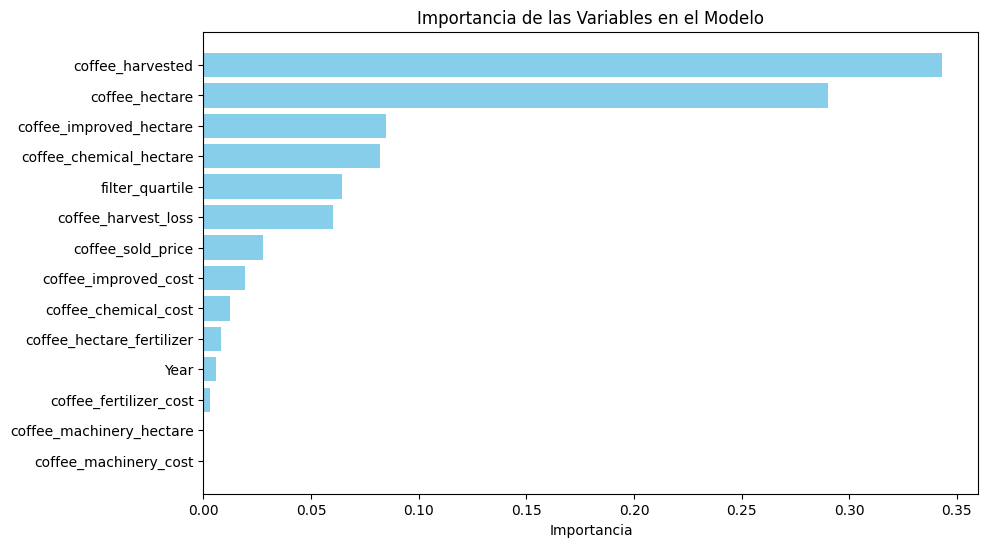

In [ ]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar la importancia
features = X.columns  # Nombres de las características
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Variables en el Modelo')
plt.gca().invert_yaxis()
plt.show()

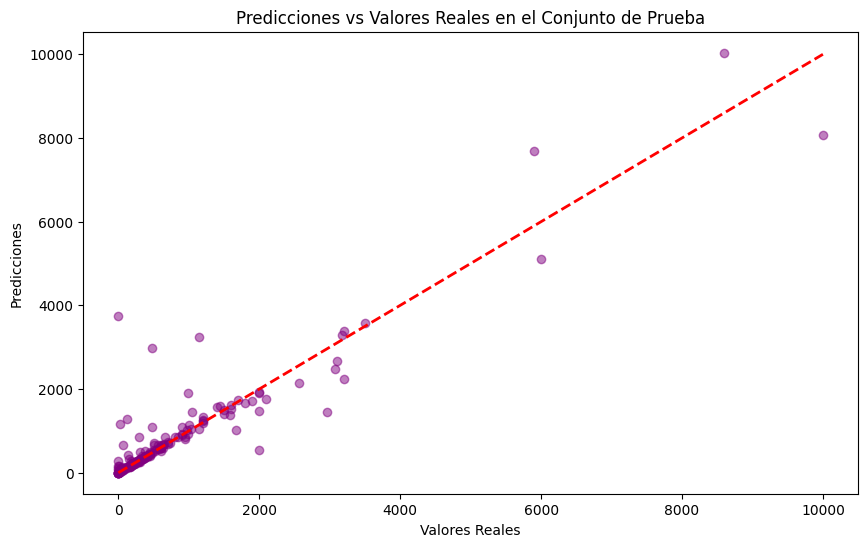

In [ ]:
# Generar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Crear un gráfico de dispersión para comparar predicciones y valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales en el Conjunto de Prueba')
plt.show()


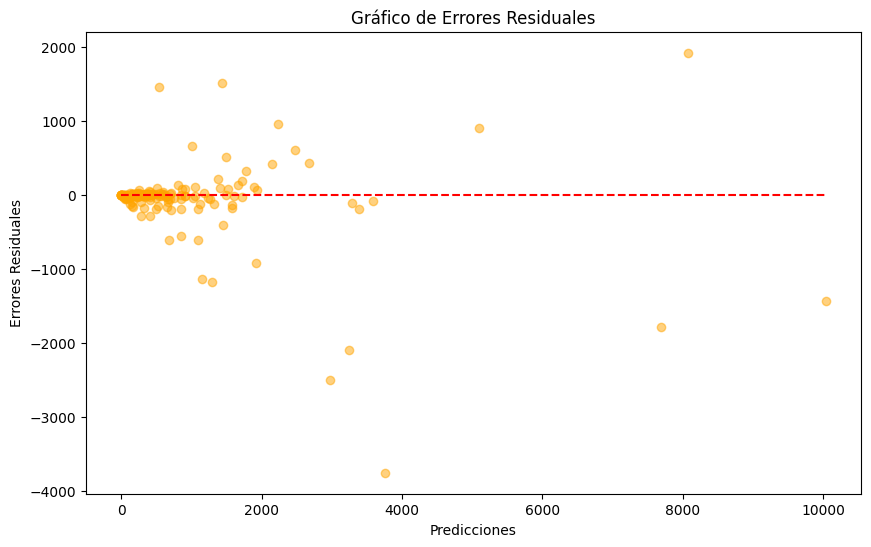

In [ ]:
# Calcular los errores residuales
residuals = y_test - y_pred

# Graficar los errores residuales
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='orange')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='dashed', colors='red')
plt.xlabel('Predicciones')
plt.ylabel('Errores Residuales')
plt.title('Gráfico de Errores Residuales')
plt.show()


In [ ]:
import pandas as pd

def calcular_filter_quartile(coffee_hectare, coffee_harvested, coffee_sold_price, coffee_harvest_loss):
    suma = coffee_hectare + coffee_harvested + coffee_sold_price + coffee_harvest_loss + coffee_harvested  # Ajuste según lo solicitado
    if suma < 2678.75:
        return 0
    elif 2701.25 <= suma <= 4614.50:
        return 1
    elif 4628.50 <= suma <= 8002.00:
        return 2
    elif suma > 8061.00:
        return 3

def predecir_rendimiento(Year, coffee_hectare, coffee_improved_hectare, coffee_improved_cost,
                         coffee_hectare_fertilizer, coffee_fertilizer_cost, coffee_chemical_hectare,
                         coffee_chemical_cost, coffee_machinery_hectare, coffee_machinery_cost,
                         coffee_harvested, coffee_sold_price, coffee_harvest_loss, modelo):

    # Calcular filter_quartile basado en la suma de las variables
    filter_quartile = calcular_filter_quartile(coffee_hectare, coffee_harvested, coffee_sold_price, coffee_harvest_loss)

    # Crear DataFrame con la estructura esperada por el modelo
    entrada = pd.DataFrame({
        'Year': [Year],
        'coffee_hectare': [coffee_hectare],
        'coffee_improved_hectare': [coffee_improved_hectare],
        'coffee_improved_cost': [coffee_improved_cost],
        'coffee_hectare_fertilizer': [coffee_hectare_fertilizer],
        'coffee_fertilizer_cost': [coffee_fertilizer_cost],
        'coffee_chemical_hectare': [coffee_chemical_hectare],
        'coffee_chemical_cost': [coffee_chemical_cost],
        'coffee_machinery_hectare': [coffee_machinery_hectare],
        'coffee_machinery_cost': [coffee_machinery_cost],
        'coffee_harvested': [coffee_harvested],
        'coffee_sold_price': [coffee_sold_price],
        'coffee_harvest_loss': [coffee_harvest_loss],
        'filter_quartile': [filter_quartile]
    })

    # Realizar la predicción
    prediccion = modelo.predict(entrada)

    return prediccion[0]

# Ejemplo de uso
Year = 2018
coffee_hectare = 0.1
coffee_improved_hectare = 0.03
coffee_improved_cost = 0.04
coffee_hectare_fertilizer = 0.03
coffee_fertilizer_cost = 0.02
coffee_chemical_hectare = 0.01
coffee_chemical_cost = 0.02
coffee_machinery_hectare = 0.001
coffee_machinery_cost = 0.005
coffee_harvested = 0.002
coffee_sold_price = 0.1
coffee_harvest_loss = 0.01

# Calcular filter_quartile automáticamente y hacer la predicción
resultado = predecir_rendimiento(Year, coffee_hectare, coffee_improved_hectare, coffee_improved_cost,
                                 coffee_hectare_fertilizer, coffee_fertilizer_cost, coffee_chemical_hectare,
                                 coffee_chemical_cost, coffee_machinery_hectare, coffee_machinery_cost,
                                 coffee_harvested, coffee_sold_price, coffee_harvest_loss, rf_model)

print(f'Predicción de rendimiento: {resultado:.3f} kg/ha')


Predicción de rendimiento: 10.420 kg/ha


In [ ]:
pip install onnxmltools


In [ ]:
pip install onnxruntime

In [ ]:
pip install onnxconverter_common


In [ ]:
!pip install skl2onnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 4.6 MB/s eta 0:00:00


In [ ]:
import onnxmltools
from onnxmltools.convert.common.data_types import FloatTensorType

# Convertir el modelo RandomForest a ONNX
onnx_model = onnxmltools.convert_sklearn(rf_model, initial_types=[('input', FloatTensorType([None, X_train.shape[1]]))])

# Guardar el modelo ONNX en un archivo
with open("rf_model_cafe.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("Modelo guardado en formato ONNX como 'rf_model_cafe.onnx'")


Modelo guardado en formato ONNX como 'rf_model_cafe.onnx'


In [ ]:
import onnxruntime as ort
import numpy as np

# Cargar el modelo ONNX
session = ort.InferenceSession("rf_model_cafe.onnx")

# Preparar los datos de prueba para la predicción
X_test_numpy = X_test.to_numpy().astype(np.float32)

# Hacer una predicción con el modelo ONNX
onnx_pred = session.run(None, {"input": X_test_numpy})[0]

# Evaluar el rendimiento del modelo ONNX
onnx_mae = mean_absolute_error(y_test, onnx_pred)
onnx_r2 = r2_score(y_test, onnx_pred)

# Imprimir los resultados de comparación
print(f"Mean Absolute Error (MAE) - Scikit-learn: {mae}, ONNX: {onnx_mae}")
print(f"R-squared (R²) - Scikit-learn: {r2}, ONNX: {onnx_r2}")

Mean Absolute Error (MAE) - Scikit-learn: 184.51197053406997, ONNX: 184.51194675192647
R-squared (R²) - Scikit-learn: 0.8442235795141263, ONNX: 0.8442236185073853
